In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
data = pd.read_csv("log2.csv")

In [13]:
data.head()

,windowSize,probOfBadChannel,probOfBadNACK,probOfGoodNACK,packetCount,expected,frequency
0,2,0.01,0.7,0.01,100,0.080000,"{(0, 0): 46, (0, 1): 2, (0, -1): 2}"
1,2,0.01,0.7,0.01,1000,0.080550,"{(0, 0): 477, (1, 0): 7, (-1, 0): 7, (0, 1): 6..."
2,2,0.01,0.7,0.01,10000,0.071007,"{(0, 0): 4793, (0, 1): 68, (0, -1): 69, (1, 0)..."
3,2,0.01,0.7,0.01,100000,0.073399,"{(0, 0): 47962, (0, 1): 573, (0, -1): 567, (1,..."
4,2,0.01,0.7,0.01,1000000,0.073022,"{(0, 0): 479976, (0, 1): 5855, (0, -1): 5734, ..."


In [14]:
x = data.groupby(["windowSize","probOfBadChannel"]).agg({"expected":"mean"})
colors = ['blue', 'green', 'orange', 'red', 'purple']

In [20]:
filtered_x01 = x.loc[x.index.get_level_values("probOfBadChannel") == 0.01]
filtered_x02 = x.loc[x.index.get_level_values("probOfBadChannel") == 0.02]
filtered_x05 = x.loc[x.index.get_level_values("probOfBadChannel") == 0.05]
filtered_x1 = x.loc[x.index.get_level_values("probOfBadChannel") == 0.1]
filtered_x2 = x.loc[x.index.get_level_values("probOfBadChannel") == 0.2]

Text(0, 0.5, 'AoI')

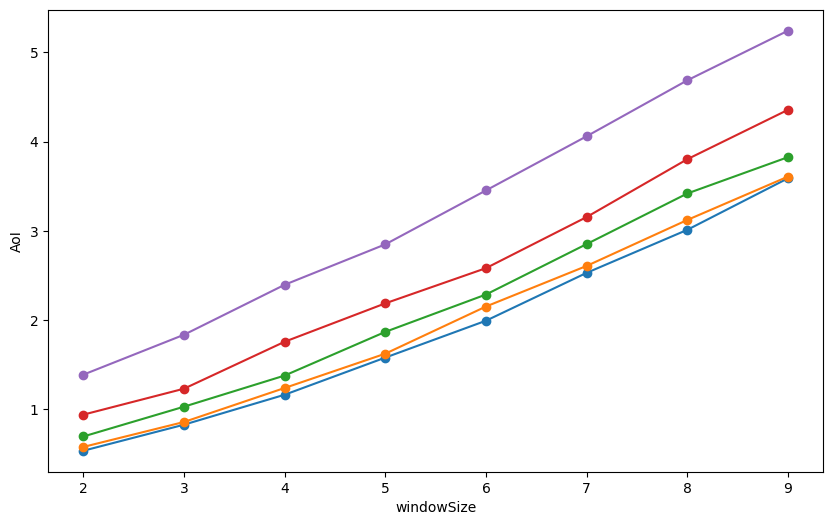

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(filtered_x01.index.get_level_values("windowSize"), filtered_x01["expected"], marker='o')
plt.plot(filtered_x02.index.get_level_values("windowSize"), filtered_x02["expected"], marker='o')
plt.plot(filtered_x05.index.get_level_values("windowSize"), filtered_x05["expected"], marker='o')
plt.plot(filtered_x1.index.get_level_values("windowSize"), filtered_x1["expected"], marker='o')
plt.plot(filtered_x1.index.get_level_values("windowSize"), filtered_x2["expected"], marker='o')
plt.xlabel("windowSize")
plt.ylabel("AoI")

